In [1]:
!pip install arff

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import pandas as pd
from scipy.io import arff

# Load ARFF file
data, meta = arff.loadarff('medical-train.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings (if needed)
for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode('utf-8')

print(df)

ValueError: {0 1 value not in ('0', '1')

In [ ]:
def inspect_and_fix_arff_data(arff_path):
    # Read the content of the ARFF file
    with open(arff_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Variables to track and modify data lines
    data_start = False
    corrected_lines = []
    issues_count = 0

    for line in lines:
        if '@data' in line.lower():
            data_start = True
            corrected_lines.append(line)
            continue
        
        if data_start:
            # Remove unwanted characters and incorrect formatting
            original_line = line.strip()
            # Assuming the data values are separated by commas without spaces
            elements = original_line.split(',')
            corrected_elements = []
            for el in elements:
                cleaned_el = el.strip('{} ')  # Clean up braces and spaces
                if cleaned_el not in ['0', '1']:
                    cleaned_el = '0'  # Defaulting to '0' if it doesn't match
                    issues_count += 1
                corrected_elements.append(cleaned_el)
            corrected_line = ','.join(corrected_elements) + '\n'
            corrected_lines.append(corrected_line)
        else:
            corrected_lines.append(line)

    # Write the corrected content to a new ARFF file
    corrected_arff_path = arff_path.replace('.arff', '_corrected.arff')
    with open(corrected_arff_path, 'w', encoding='utf-8') as file:
        file.writelines(corrected_lines)

    return f"Fixed {issues_count} issues. Corrected file saved to {corrected_arff_path}"

# Specify the path to your original ARFF file
original_arff_path = 'medical-train.arff'

# Call the function to inspect and fix
fix_result = inspect_and_fix_arff_data(original_arff_path)
print(fix_result)


In [ ]:
import pandas as pd

def clean_and_convert_arff_to_csv(arff_path, csv_path):
    # Read the ARFF file content
    with open(arff_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Variables to identify and process the data section
    data_section = False
    data = []
    attributes = []

    # Process each line
    for line in lines:
        if line.strip().lower() == '@data':
            data_section = True  # Identify the start of the data section
            continue
        if not data_section:
            if line.strip().lower().startswith('@attribute'):
                attr_name = line.split()[1].strip()
                attributes.append(attr_name)  # Collect attribute names
        else:
            # Clean and split data entries
            entry = line.strip().replace('{', '').replace('}', '').replace(' ', '')
            parts = entry.split(',')
            if len(parts) == len(attributes):  # Ensure the data line is complete
                # Filter to keep only '0' or '1' values, set default to '0'
                cleaned_parts = [p if p in ['0', '1'] else '0' for p in parts]
                data.append(cleaned_parts)

    # Create a DataFrame from the cleaned data
    df = pd.DataFrame(data, columns=attributes)

    # Save the DataFrame to CSV
    df.to_csv(csv_path, index=False)
    return f"CSV file successfully created at {csv_path}"

# Paths to the ARFF file and the target CSV file
arff_path = 'medical-train.arff'
csv_path = 'medical-train.csv'

# Convert and clean the ARFF file to CSV
result = clean_and_convert_arff_to_csv(arff_path, csv_path)
print(result)


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, hamming_loss, classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Path to the dataset
file_path = 'healthcare_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Discharge Date', 'Name']
df.drop(columns=columns_to_drop, inplace=True)

# Drop rows with null values
df.dropna(inplace=True)




In [10]:
# Initialize LabelEncoders for each categorical feature
le_gender = LabelEncoder()
le_blood_type = LabelEncoder()
le_medical_condition = LabelEncoder()
le_medication = LabelEncoder()
le_test_results = LabelEncoder()
le_admission_type = LabelEncoder()

# Apply LabelEncoders to the corresponding columns
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Blood Type'] = le_blood_type.fit_transform(df['Blood Type'])
df['Medical Condition'] = le_medical_condition.fit_transform(df['Medical Condition'])
df['Medication'] = le_medication.fit_transform(df['Medication'])
df['Test Results'] = le_test_results.fit_transform(df['Test Results'])
df['Admission Type'] = le_admission_type.fit_transform(df['Admission Type'])
df.head(5)


,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,30,1,5,2,2,3,2
1,62,1,0,5,1,1,1
2,76,0,1,5,1,0,2
3,28,0,6,3,0,1,0
4,43,0,2,2,2,4,0


                Age        Gender    Blood Type  Medical Condition  \
count  55500.000000  55500.000000  55500.000000       55500.000000   
mean      51.539459      0.500432      3.492595           2.498847   
std       19.602454      0.500004      2.289700           1.708336   
min       13.000000      0.000000      0.000000           0.000000   
25%       35.000000      0.000000      1.000000           1.000000   
50%       52.000000      1.000000      3.000000           3.000000   
75%       68.000000      1.000000      5.000000           4.000000   
max       89.000000      1.000000      7.000000           5.000000   

       Admission Type    Medication  Test Results  
count    55500.000000  55500.000000  55500.000000  
mean         0.998577      1.998054      0.998018  
std          0.819048      1.413244      0.818089  
min          0.000000      0.000000      0.000000  
25%          0.000000      1.000000      0.000000  
50%          1.000000      2.000000      1.000000  
75%  

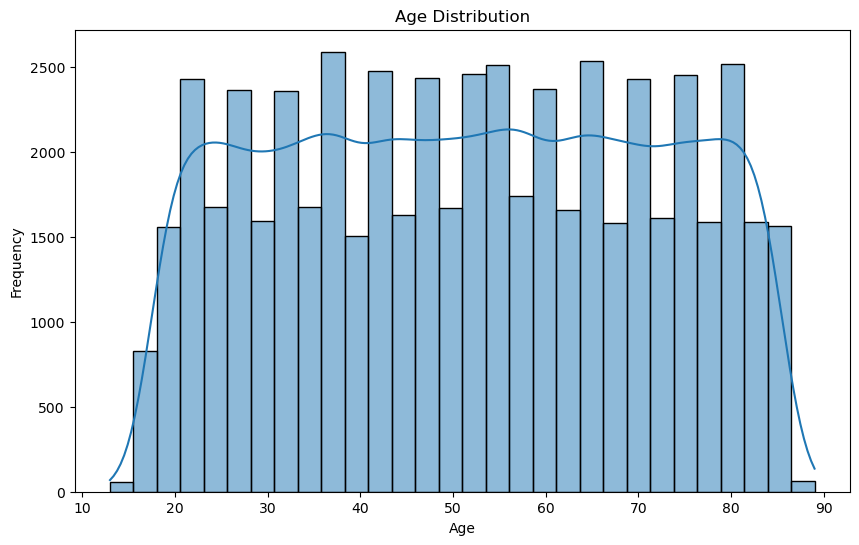

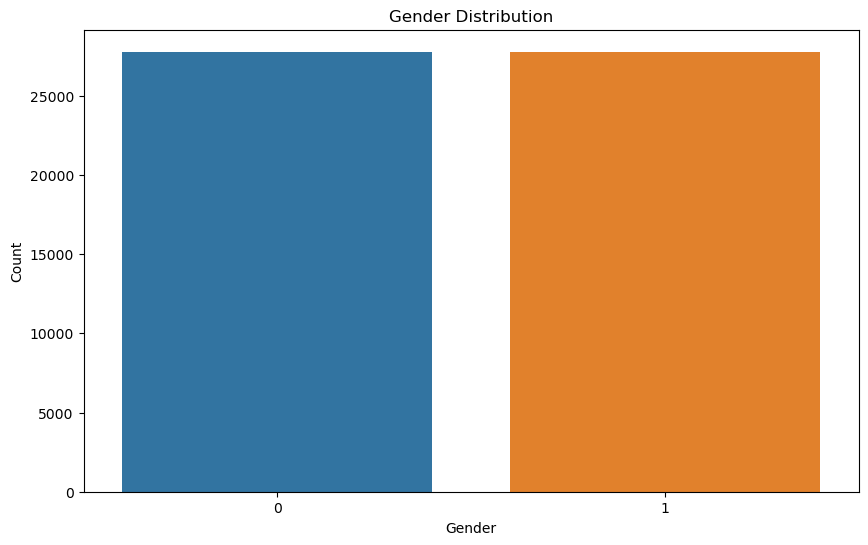

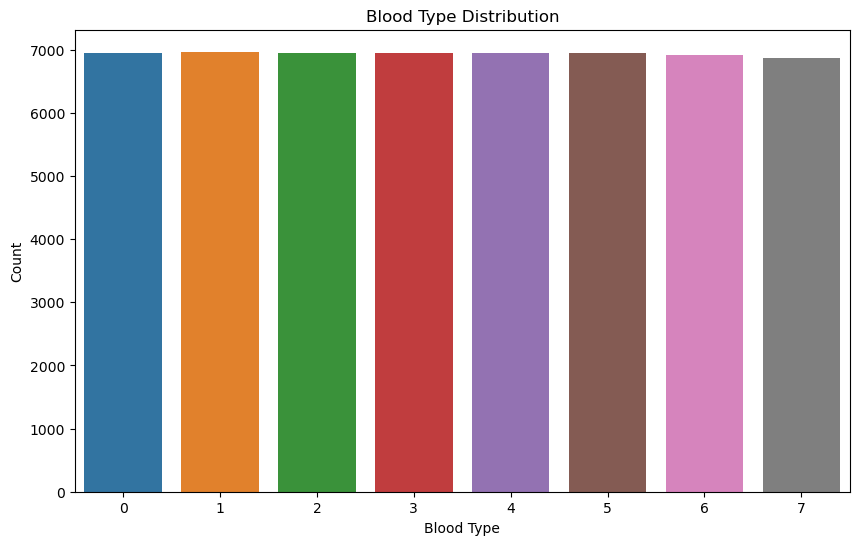

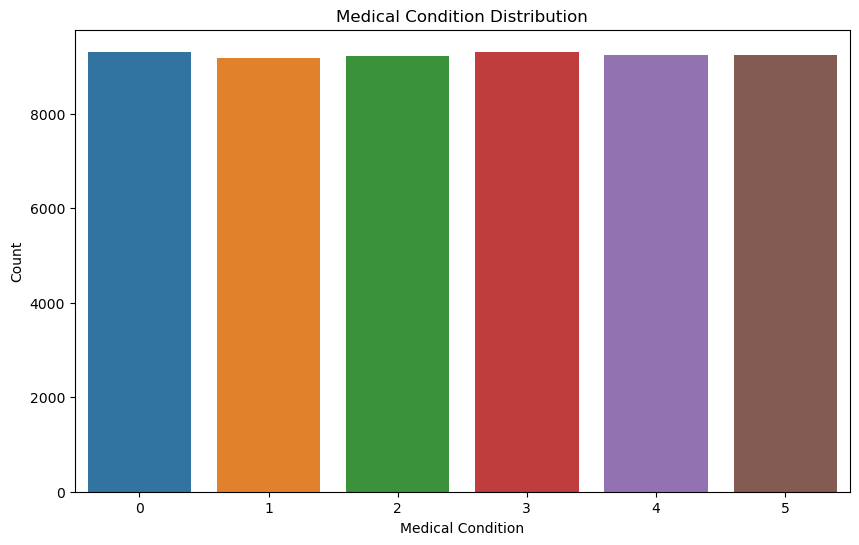

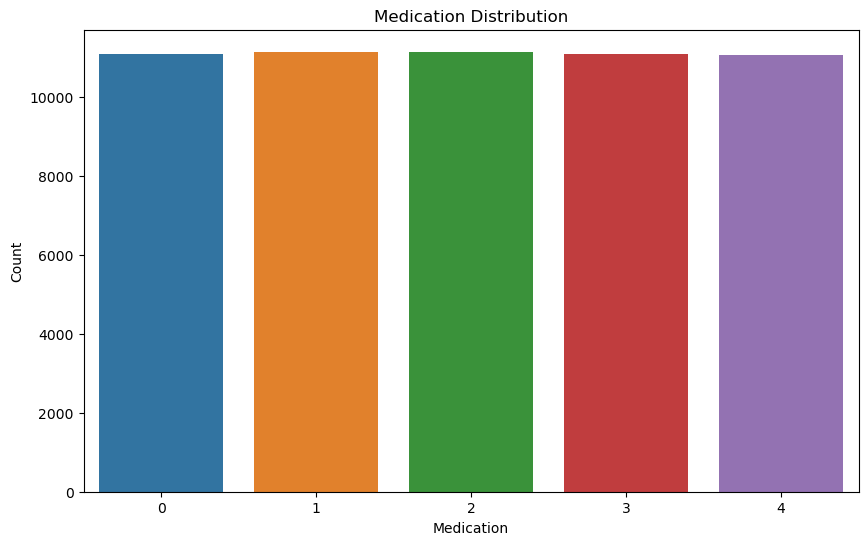

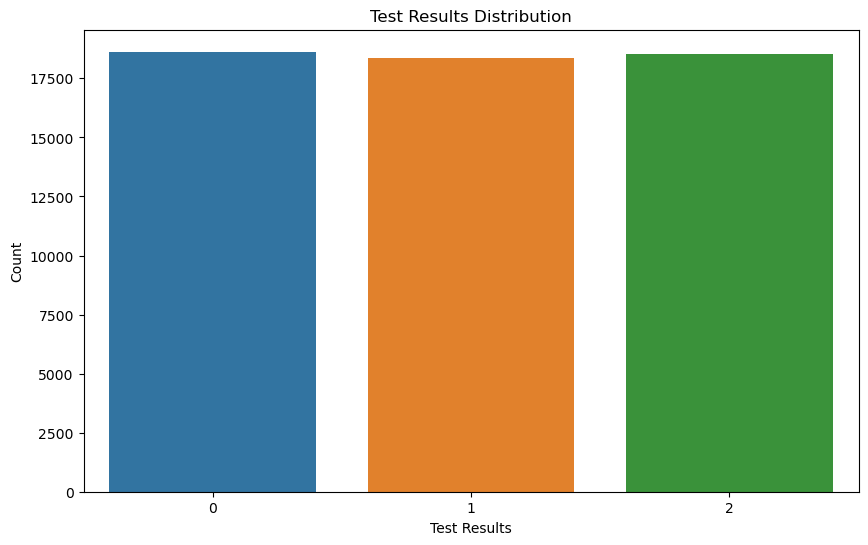

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Distribution of the Age column
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count plots for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Blood Type')
plt.title('Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medical Condition')
plt.title('Medical Condition Distribution')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medication')
plt.title('Medication Distribution')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Test Results')
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()


In [16]:
# Split the data into features (X) and target (y)
X = df.drop('Test Results', axis=1)
y = df['Test Results'].values  # Convert to NumPy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)



In [29]:
class MLkNN:
    def __init__(self, k=3, s=1):
        self.k = k
        self.s = s

    def fit(self, X_train, y_train):
        self.n_labels = len(np.unique(y_train))
        self.neigh = NearestNeighbors(n_neighbors=self.k)
        self.neigh.fit(X_train)
        self.y_train = y_train
        self.prior_prob = np.zeros((self.n_labels, 2))
        for label in range(self.n_labels):
            m = np.sum(y_train == label)
            self.prior_prob[label, 1] = (self.s + m) / (self.s * 2 + len(y_train))
            self.prior_prob[label, 0] = 1 - self.prior_prob[label, 1]

    def predict(self, X_test):
        neighbors = self.neigh.kneighbors(X_test, return_distance=False)
        y_pred = np.zeros(X_test.shape[0], dtype=int)
        for idx, x in enumerate(X_test):
            label_counts = np.zeros(self.n_labels)
            for neighbor in neighbors[idx]:
                label_counts[self.y_train[neighbor]] += 1
            posterior_prob = np.zeros((self.n_labels, 2))
            for label in range(self.n_labels):
                for j in range(2):
                    posterior_prob[label, j] = self.prior_prob[label, j]
                    posterior_prob[label, j] *= (self.s + label_counts[label]) / (self.s * (self.k + 1) + np.sum(label_counts))
                y_pred[idx] = np.argmax(posterior_prob[label])
        return y_pred



In [26]:
#Fahad's modification
class MLkNN_2:
    def __init__(self, k, s=1):
        self.k = k  # Number of nearest neighbors to consider
        self.s = s  # Smoothing parameter for Bayesian adjustment

    def fit(self, X_train, y_train):
        self.n_labels = y_train.shape[1]  # Number of labels in the dataset
        self.neigh = NearestNeighbors(n_neighbors=self.k)  # Initialize the NearestNeighbors model with k neighbors
        self.neigh.fit(X_train)  # Fit the NearestNeighbors model using the training data
        self.y_train = y_train  # Store the training labels

        # Initialize the prior probabilities matrix
        self.prior_prob = np.zeros((self.n_labels, 2))  # Create a zero matrix for prior probabilities, size (n_labels x 2)

        for label in range(self.n_labels):
            # Calculate the number of instances with the current label
            m = np.sum(y_train[:, label])  
            # Compute prior probability for the label being present
            self.prior_prob[label, 1] = (self.s + m) / (self.s * 2 + len(y_train))
            # Compute prior probability for the label being absent
            self.prior_prob[label, 0] = 1 - self.prior_prob[label, 1]

    def predict(self, X_test):
        # Find the k-nearest neighbors for each test instance
        neighbors = self.neigh.kneighbors(X_test, return_distance=False)
        # Initialize the prediction matrix
        y_pred = np.zeros((X_test.shape[0], self.n_labels))  # Create a zero matrix for predictions, size (n_test_samples x n_labels)
        y_prob = np.zeros((X_test.shape[0], self.n_labels))  # Create a zero matrix for probabilities, size (n_test_samples x n_labels)

        for idx, x in enumerate(X_test):
            # Initialize a count matrix for the number of neighbors with each label
            label_counts = np.zeros((self.n_labels, self.k + 1))

            for label in range(self.n_labels):
                # Count the number of neighbors with the current label for the test instance
                neighbor_label_counts = np.zeros(self.k + 1)
                for neighbor in neighbors[idx]:
                    neighbor_label_counts[int(self.y_train[neighbor, label])] += 1

                # Update label counts for the current label
                label_counts[label] = neighbor_label_counts

                # Initialize posterior probability array
                posterior_prob = np.zeros(2)  # Array to store posterior probabilities for the current label (present/absent)

                for j in range(2):
                    posterior_prob[j] = self.prior_prob[label, j]  # Start with the prior probability
                    for count in range(self.k + 1):
                        # Bayesian correction for the posterior probability
                        posterior_prob[j] *= ((self.s + label_counts[label, count]) / 
                                              (self.s * (self.k + 1) + np.sum(label_counts[label, :])))

                # Determine the predicted label by selecting the one with the higher posterior probability
                y_pred[idx, label] = np.argmax(posterior_prob)

                # Calculate the probability ~rt(l) of label l being present in t
                y_prob[idx, label] = (self.prior_prob[label, 1] * posterior_prob[1]) / \
                                     (self.prior_prob[label, 0] * posterior_prob[0] + self.prior_prob[label, 1] * posterior_prob[1])

        return y_pred, y_prob  # Return the prediction matrix and probability matrix

In [30]:
# Initialize and fit the MLkNN model
mlknn = MLkNN(k=3, s=1)

# Print shape of y_train before reshaping
print("Shape of y_train before reshaping:", y_train.shape)


mlknn.fit(X_train, y_train)

# Predict on the test set
y_pred_mlknn = mlknn.predict(X_test)


# Evaluate the MLkNN model
print("MLkNN Accuracy:", accuracy_score(y_test, y_pred_mlknn))
print("MLkNN Classification Report:\n", classification_report(y_test, y_pred_mlknn))

# Train and evaluate Rank-SVM model (using SVC with one-vs-rest strategy)
rank_svm = SVC(kernel='poly', degree=8, C=1)
rank_svm.fit(X_train, y_train)
y_pred_rank_svm = rank_svm.predict(X_test)

# Evaluate the Rank-SVM model
print("Rank-SVM Accuracy:", accuracy_score(y_test, y_pred_rank_svm))
print("Rank-SVM Classification Report:\n", classification_report(y_test, y_pred_rank_svm))

# Train and evaluate BoosTexter model (using AdaBoostClassifier as a proxy)
boostexter = AdaBoostClassifier(n_estimators=30, random_state=42)
boostexter.fit(X_train, y_train)
y_pred_boostexter = boostexter.predict(X_test)

# Evaluate the BoosTexter model
print("BoosTexter Accuracy:", accuracy_score(y_test, y_pred_boostexter))
print("BoosTexter Classification Report:\n", classification_report(y_test, y_pred_boostexter))

# Train and evaluate AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

# Evaluate the AdaBoost model
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_adaboost))

Shape of y_train before reshaping: (38850, 1)
MLkNN Accuracy: 0.3389189189189189
MLkNN Classification Report:
               precision    recall  f1-score   support

           0       0.34      1.00      0.51      5643
           1       0.00      0.00      0.00      5418
           2       0.00      0.00      0.00      5589

    accuracy                           0.34     16650
   macro avg       0.11      0.33      0.17     16650
weighted avg       0.11      0.34      0.17     16650



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\util

Rank-SVM Accuracy: 0.338978978978979
Rank-SVM Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.92      0.50      5643
           1       0.34      0.05      0.08      5418
           2       0.33      0.03      0.06      5589

    accuracy                           0.34     16650
   macro avg       0.34      0.33      0.21     16650
weighted avg       0.34      0.34      0.21     16650



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BoosTexter Accuracy: 0.3342942942942943
BoosTexter Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.34      0.34      5643
           1       0.32      0.34      0.33      5418
           2       0.34      0.32      0.33      5589

    accuracy                           0.33     16650
   macro avg       0.33      0.33      0.33     16650
weighted avg       0.33      0.33      0.33     16650



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Accuracy: 0.33405405405405403
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.35      0.35      5643
           1       0.33      0.35      0.34      5418
           2       0.34      0.30      0.32      5589

    accuracy                           0.33     16650
   macro avg       0.33      0.33      0.33     16650
weighted avg       0.33      0.33      0.33     16650



In [22]:
from sklearn.metrics import hamming_loss
ham_ada = hamming_loss(y_test, y_pred_adaboost)
print(ham_ada)

0.6659459459459459


In [31]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

class MLkNN_3:
    def __init__(self, k, s=1):
        self.k = k  # Number of nearest neighbors to consider
        self.s = s  # Smoothing parameter for Bayesian adjustment

    def fit(self, X_train, y_train):
        self.n_labels = y_train.shape[1]  # Number of labels in the dataset
        self.neigh = NearestNeighbors(n_neighbors=self.k)  # Initialize the NearestNeighbors model with k neighbors
        self.neigh.fit(X_train)  # Fit the NearestNeighbors model using the training data
        self.y_train = y_train  # Store the training labels

        # Initialize the prior probabilities matrix
        self.prior_prob = np.zeros((self.n_labels, 2))  # Create a zero matrix for prior probabilities, size (n_labels x 2)

        for label in range(self.n_labels):
            # Calculate the number of instances with the current label
            m = np.sum(y_train[:, label])  
            # Compute prior probability for the label being present
            self.prior_prob[label, 1] = (self.s + m) / (self.s * 2 + len(y_train))
            # Compute prior probability for the label being absent
            self.prior_prob[label, 0] = 1 - self.prior_prob[label, 1]

    def predict(self, X_test):
        # Find the k-nearest neighbors for each test instance
        neighbors = self.neigh.kneighbors(X_test, return_distance=False)
        # Initialize the prediction matrix
        y_pred = np.zeros((X_test.shape[0], self.n_labels))  # Create a zero matrix for predictions, size (n_test_samples x n_labels)
        y_prob = np.zeros((X_test.shape[0], self.n_labels))  # Create a zero matrix for probabilities, size (n_test_samples x n_labels)

        for idx, x in enumerate(X_test):
            # Initialize a count matrix for the number of neighbors with each label
            label_counts = np.zeros((self.n_labels, self.k + 1))

            for label in range(self.n_labels):
                # Count the number of neighbors with the current label for the test instance
                neighbor_label_counts = np.zeros(self.k + 1)
                for neighbor in neighbors[idx]:
                    neighbor_label_counts[int(self.y_train[neighbor, label])] += 1

                # Update label counts for the current label
                label_counts[label] = neighbor_label_counts

                # Initialize posterior probability array
                posterior_prob = np.zeros(2)  # Array to store posterior probabilities for the current label (present/absent)

                for j in range(2):
                    posterior_prob[j] = self.prior_prob[label, j]  # Start with the prior probability
                    for count in range(self.k + 1):
                        # Bayesian correction for the posterior probability
                        posterior_prob[j] *= ((self.s + label_counts[label, count]) / 
                                              (self.s * (self.k + 1) + np.sum(label_counts[label, :])))

                # Determine the predicted label by selecting the one with the higher posterior probability
                y_pred[idx, label] = np.argmax(posterior_prob)

                # Calculate the probability ~rt(l) of label l being present in t
                y_prob[idx, label] = (self.prior_prob[label, 1] * posterior_prob[1]) / \
                                     (self.prior_prob[label, 0] * posterior_prob[0] + self.prior_prob[label, 1] * posterior_prob[1])

        return y_pred, y_prob  # Return the prediction matrix and probability matrix

# Example Usage:
# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed

# Initialize and fit the MLkNN model
mlknn = MLkNN_3(k=3, s=1)
mlknn.fit(X_train, y_train)

# Predict on the test set
y_pred_mlknn, y_prob_mlknn = mlknn.predict(X_test)

# Evaluate the MLkNN model
print("MLkNN Accuracy:", accuracy_score(y_test, y_pred_mlknn))
print("MLkNN Classification Report:\n", classification_report(y_test, y_pred_mlknn))


MLkNN Accuracy: 0.3389189189189189
MLkNN Classification Report:
               precision    recall  f1-score   support

           0       0.34      1.00      0.51      5643
           1       0.50      0.00      0.00      5418
           2       0.00      0.00      0.00      5589

    accuracy                           0.34     16650
   macro avg       0.28      0.33      0.17     16650
weighted avg       0.28      0.34      0.17     16650



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
